In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)



In [2]:
df = pd.read_json("stage1.json")

In [3]:
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'registration',
       'prev_owner', 'hp', 'Type', 'Next Inspection', 'Inspection new',
       'Warranty', 'Make', 'Model', 'First Registration', 'Body Color',
       'Upholstery', 'Body', 'Nr. of Doors', 'Nr. of Seats', 'Gearing Type',
       'Displacement', 'Weight', 'Drive chain', 'Consumption', 'CO2 Emission',
       'Emission Class', '\nComfort & Convenience\n',
       '\nEntertainment & Media\n', '\nExtras\n', '\nSafety & Security\n',
       'Emission Label', 'Gears', 'Country version'],
      dtype='object')

In [4]:
df.head()

make_model body_type  price               vat         km registration  \
0    Audi A1    Sedans  15770    VAT deductible  56,013 km      01/2016   
1    Audi A1    Sedans  14500  Price negotiable  80,000 km      03/2017   
2    Audi A1    Sedans  14640    VAT deductible  83,450 km      02/2016   
3    Audi A1    Sedans  14500              None  73,000 km      08/2016   
4    Audi A1    Sedans  16790              None  16,200 km      05/2016   

          prev_owner      hp                                     Type  \
0  2 previous owners   66 kW  [, Used, , Diesel (Particulate Filter)]   
1               None  141 kW                     [, Used, , Gasoline]   
2   1 previous owner   85 kW  [, Used, , Diesel (Particulate Filter)]   
3   1 previous owner   66 kW  [, Used, , Diesel (Particulate Filter)]   
4   1 previous owner   66 kW  [, Used, , Diesel (Particulate Filter)]   

                         Next Inspection                      Inspection new  \
0  [\n06/2021\n, \n99 g CO2/km (comb)\n]               [\nYes\n, \nEuro 6\n]   
1                                   None                                None   
2                                   None                                None   
3                                   None                                None   
4                                   None  [\nYes\n, \n109 g CO2/km (comb)\n]   

  Warranty      Make         Model First Registration       Body Color  \
0           \nAudi\n  [\n, A1, \n]     [\n, 2016, \n]  [\n, Black, \n]   
1     None  \nAudi\n  [\n, A1, \n]     [\n, 2017, \n]    [\n, Red, \n]   
2           \nAudi\n  [\n, A1, \n]     [\n, 2016, \n]  [\n, Black, \n]   
3     None  \nAudi\n  [\n, A1, \n]     [\n, 2016, \n]  [\n, Brown, \n]   
4           \nAudi\n  [\n, A1, \n]     [\n, 2016, \n]  [\n, Black, \n]   

           Upholstery              Body Nr. of Doors Nr. of Seats  \
0  [\nCloth, Black\n]  [\n, Sedans, \n]      [\n5\n]      [\n5\n]   
1   [\nCloth, Grey\n]  [\n, Sedans, \n]      [\n3\n]      [\n4\n]   
2  [\nCloth, Black\n]  [\n, Sedans, \n]      [\n4\n]      [\n4\n]   
3                None  [\n, Sedans, \n]      [\n3\n]      [\n4\n]   
4  [\nCloth, Black\n]  [\n, Sedans, \n]      [\n5\n]      [\n5\n]   

          Gearing Type    Displacement          Weight  Drive chain  \
0  [\n, Automatic, \n]  [\n1,422 cc\n]  [\n1,220 kg\n]  [\nfront\n]   
1  [\n, Automatic, \n]  [\n1,798 cc\n]  [\n1,255 kg\n]  [\nfront\n]   
2  [\n, Automatic, \n]  [\n1,598 cc\n]            None  [\nfront\n]   
3  [\n, Automatic, \n]  [\n1,422 cc\n]  [\n1,195 kg\n]         None   
4  [\n, Automatic, \n]  [\n1,422 cc\n]            None  [\nfront\n]   

                                         Consumption  \
0  [[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...   
1  [[5.6 l/100 km (comb)], [7.1 l/100 km (city)],...   
2  [[3.8 l/100 km (comb)], [4.4 l/100 km (city)],...   
3  [[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...   
4  [[4.1 l/100 km (comb)], [4.6 l/100 km (city)],...   

                CO2 Emission Emission Class  \
0   [\n99 g CO2/km (comb)\n]   [\nEuro 6\n]   
1  [\n129 g CO2/km (comb)\n]   [\nEuro 6\n]   
2   [\n99 g CO2/km (comb)\n]   [\nEuro 6\n]   
3   [\n99 g CO2/km (comb)\n]   [\nEuro 6\n]   
4  [\n109 g CO2/km (comb)\n]   [\nEuro 6\n]   

                           \nComfort & Convenience\n  \
0  [Air conditioning, Armrest, Automatic climate ...   
1  [Air conditioning, Automatic climate control, ...   
2  [Air conditioning, Cruise control, Electrical ...   
3  [Air suspension, Armrest, Auxiliary heating, E...   
4  [Air conditioning, Armrest, Automatic climate ...   

                           \nEntertainment & Media\n  \
0  [Bluetooth, Hands-free equipment, On-board com...   
1  [Bluetooth, Hands-free equipment, On-board com...   
2                           [MP3, On-board computer]   
3  [Bluetooth, CD player, Hands-free equipment, M...   
4  [Bluetooth, CD player, Hands-free equipment, M...   

                                          \nExtras

In [5]:
df.shape

(15919, 34)

In [6]:
df.shape

(15919, 34)

### make_model 
**Bu sütunda yer alan veriler üzerinde herhangi bir cleaning işlemi yapmaya gerek yok.**

In [7]:
df.make_model.sample(5)
    

8986         Opel Corsa
8456         Opel Corsa
2157            Audi A1
15101    Renault Espace
1820            Audi A1
Name: make_model, dtype: object

In [8]:
df.make_model.isnull().sum()

0

### body_type
**bu sütun üzerinde data cleaning işlemi yapmaya gerek yok.

In [9]:
df.body_type.isnull().sum()

60

In [10]:
df.body_type.value_counts(dropna = False)


Sedans           7903
Station wagon    3553
Compact          3153
Van               783
Other             290
Transporter        88
NaN                60
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64

In [11]:
df[df.make_model == 'Audi A3'].body_type.value_counts(dropna = False)

Sedans           2598
Station wagon     282
Compact           182
Other              16
Convertible         8
NaN                 7
Coupe               4
Name: body_type, dtype: int64

In [12]:

imputer = SimpleImputer(missing_values=None, strategy='most_frequent')

df.body_type = imputer.fit_transform(df['body_type'].values.reshape(-1,1))[:,0]

df.body_type.value_counts(dropna=False)




Sedans           7963
Station wagon    3553
Compact          3153
Van               783
Other             290
Transporter        88
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64

In [13]:
imputer = SimpleImputer(missing_values='Other', strategy='most_frequent')

df.body_type = imputer.fit_transform(df[['body_type']].values)[:,0]

df.body_type.value_counts(dropna=False)

# df[['body_type']].values ile tek boyutlu diziyi yine çift boyutlu yapmış olduk. 

Sedans           8253
Station wagon    3553
Compact          3153
Van               783
Transporter        88
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64

In [14]:
df['body_type'].values.ndim

1

In [15]:
df['body_type'].values.reshape(-1,1).ndim

2

In [16]:
df[['body_type']].values


array([['Sedans'],
       ['Sedans'],
       ['Sedans'],
       ...,
       ['Van'],
       ['Van'],
       ['Van']], dtype=object)

In [17]:
df[(df.body_type.isnull())&(df.make_model == 'Audi A3')][['body_type','make_model']]


Empty DataFrame
Columns: [body_type, make_model]
Index: []

In [18]:
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'registration',
       'prev_owner', 'hp', 'Type', 'Next Inspection', 'Inspection new',
       'Warranty', 'Make', 'Model', 'First Registration', 'Body Color',
       'Upholstery', 'Body', 'Nr. of Doors', 'Nr. of Seats', 'Gearing Type',
       'Displacement', 'Weight', 'Drive chain', 'Consumption', 'CO2 Emission',
       'Emission Class', '\nComfort & Convenience\n',
       '\nEntertainment & Media\n', '\nExtras\n', '\nSafety & Security\n',
       'Emission Label', 'Gears', 'Country version'],
      dtype='object')

### price

**Bu sütunda integer değerler var ve veri tipi de integer. Null değerler yok fakat outlier değerler var.**

In [19]:
df.price.dtype

dtype('int64')

In [20]:
df.price.isnull().sum()

0

In [21]:
min_price,max_price = min(df.price), max(df.price)

In [22]:
[min_price,max_price]

[13, 74600]

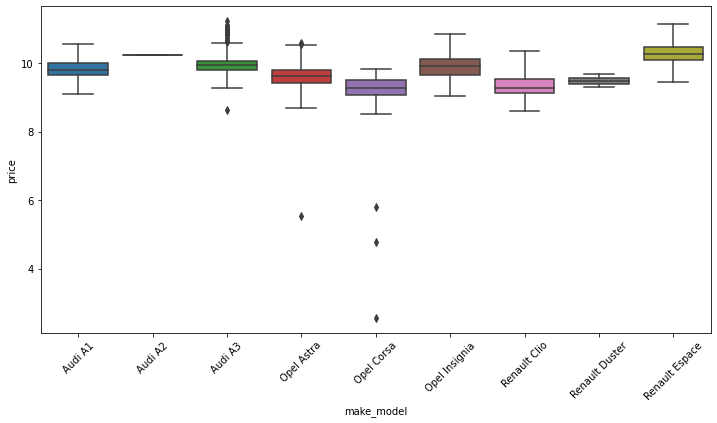

In [23]:
plt.figure(figsize = (12,6))
sns.boxplot(data = df, y = np.log(df.price), x = 'make_model', whis = 2);
plt.xticks(rotation = 45);

In [24]:
df[df.price == df.price.min()]

make_model body_type  price   vat      km registration prev_owner  \
8594  Opel Corsa    Sedans     13  None  123 km      06/2018       None   

         hp                  Type Next Inspection Inspection new Warranty  \
8594  66 kW  [, Used, , Gasoline]            None           None     None   

          Make            Model First Registration      Body Color Upholstery  \
8594  \nOpel\n  [\n, Corsa, \n]     [\n, 2018, \n]  [\n, Gold, \n]       None   

                  Body Nr. of Doors Nr. of Seats      Gearing Type  \
8594  [\n, Sedans, \n]      [\n3\n]      [\n5\n]  [\n, Manual, \n]   

        Displacement          Weight Drive chain  \
8594  [\n1,398 cc\n]  [\n1,141 kg\n]        None   

                                            Consumption  \
8594  [[5.6 l/100 km (comb)], [6.8 l/100 km (city)],...   

                   CO2 Emission      Emission Class  \
8594  [\n128 g CO2/km (comb)\n]  [\nEuro 6d-TEMP\n]   

                              \nComfort & Convenience\n  \
8594  [Air conditioning, Cruise control, Electrical ...   

                              \nEntertainment & Media\n      \nExtras\n  \
8594  [Bluetooth, CD player, Hands-free equipment, M...  [Alloy wheels]   

                                  \nSafety & Security\n Emission Label  \
8594  [ABS, Adaptive headlights, Central door lock w...           None   

        Gears Country version  
8594  [\n5\n]            None

In [25]:
df.price.nsmallest(4)

8594     13
8828    120
6066    255
8829    331
Name: price, dtype: int64

In [26]:
df.price.nlargest(4)

3648     74600
15826    68320
3649     67600
3587     64900
Name: price, dtype: int64

In [27]:
outlier_price = list(df.price.sort_values().head(4).index)

In [28]:
df.drop(index=outlier_price,axis=0,inplace=True)

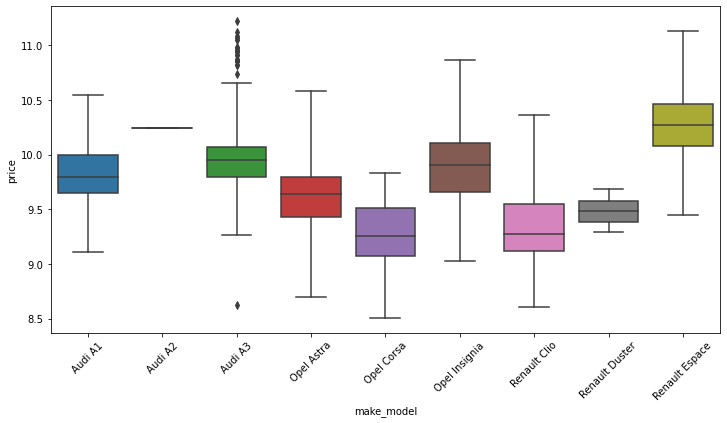

In [29]:
plt.figure(figsize = (12,6))
sns.boxplot(data = df, y = np.log(df.price), x = 'make_model', whis = 2.3);
plt.xticks(rotation = 45);

**Outlier değerler var bunlar ile daha sonra ilgileneceğiz. Outlier değerleri tespit edip bunlar ile ilgili 
karar vereceğiz.**

### vat 
**bu sütunda yer alan değerler için web sitesini incelediğimiz zaman 2 farklı seçenek vardı.
bunlardan null olanları false diğerlerini True yaptık.** 

In [30]:
df.vat.sample(5)

3902               None
4906     VAT deductible
12499    VAT deductible
12578    VAT deductible
11208              None
Name: vat, dtype: object

In [31]:
df.vat.unique()

array(['VAT deductible', 'Price negotiable', None], dtype=object)

In [32]:
df.vat.value_counts()

VAT deductible      10980
Price negotiable      426
Name: vat, dtype: int64

In [33]:
df.vat.isnull().sum()

4509

In [34]:
type(df.vat[4])

NoneType

In [35]:
df.vat = df.vat.map(lambda x: 0 if x == None else 1)

In [36]:
df.vat.value_counts()

1    11406
0     4509
Name: vat, dtype: int64

In [37]:
np.nan == np.nan  # np.nan özel bir değer. kendisine bile eşit değil.

False

In [38]:
type(np.nan)  # değer tipi olarak float döndürür.

float

### km 
**sütunu string veri tipinde. Bu sütunu temizleyip integer veri tipine çevirmeliyiz.** 

In [39]:
df.km

0        56,013 km
1        80,000 km
2        83,450 km
3        73,000 km
4        16,200 km
           ...    
15914         - km
15915     9,900 km
15916        15 km
15917        10 km
15918         - km
Name: km, Length: 15915, dtype: object

In [40]:
df.km = df.km.str.replace(',','').str.strip(' km').replace('-', np.nan).astype(float)


In [41]:
df.km

0        56013.0
1        80000.0
2        83450.0
3        73000.0
4        16200.0
          ...   
15914        NaN
15915     9900.0
15916       15.0
15917       10.0
15918        NaN
Name: km, Length: 15915, dtype: float64

**km sütunu içinde yer alan non-integer ifadeler temizlendi. Yerlerine nan değerler atandı. Nan değerlerin yerine**
**diğer sütunlar incelendikten sonra ortalama bir km değeri atamayı planlıyoruz. Şimdilik işlem yapılmadı.**

In [42]:
df.km.isnull().sum()

1024

In [43]:
df[df.km.isnull()]['First Registration'].value_counts(dropna= False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN               838
[\n, 2019, \n]    147
[\n, 2018, \n]     38
[\n, 2017, \n]      1
Name: First Registration, dtype: int64

In [44]:
df_km = df.km.fillna(0)

In [45]:
df[df.km == 0]

make_model      body_type  price  vat   km registration prev_owner  \
734           Audi A1         Sedans  30000    0  0.0          -/-       None   
2370          Audi A1         Sedans  17999    0  0.0          -/-       None   
2496          Audi A1        Compact  22720    1  0.0          -/-       None   
2501          Audi A1        Compact  22720    1  0.0          -/-       None   
5017          Audi A3         Sedans  27470    1  0.0          -/-       None   
5553          Audi A3  Station wagon  23290    0  0.0          -/-       None   
5607          Audi A3        Compact  22675    1  0.0          -/-       None   
5668          Audi A3         Sedans  25400    1  0.0          -/-       None   
5672          Audi A3         Sedans  25400    1  0.0          -/-       None   
7698       Opel Astra         Sedans  26791    1  0.0          -/-       None   
7828       Opel Astra         Sedans  23580    1  0.0          -/-       None   
8098       Opel Astra         Sedans  18980    1  0.0          -/-       None   
9882       Opel Corsa        Compact  17491    1  0.0          -/-       None   
9892       Opel Corsa        Compact  16891    1  0.0          -/-       None   
9929       Opel Corsa        Compact  17291    1  0.0          -/-       None   
9935       Opel Corsa        Compact  17091    1  0.0          -/-       None   
12512   Opel Insignia  Station wagon  36591    1  0.0          -/-       None   
14518    Renault Clio        Compact  10790    0  0.0          -/-       None   
15668  Renault Espace            Van  39290    0  0.0          -/-       None   

           hp                                               Type  \
734     85 kW                                [, New, , Gasoline]   
2370    70 kW                                [, New, , Gasoline]   
2496    85 kW                                [, New, , Super 95]   
2501    85 kW                                [, New, , Super 95]   
5017    85 kW                                  [, New, , Diesel]   
5553    85 kW                            [, New, , Super E10 95]   
5607    85 kW                                [, New, , Gasoline]   
5668    85 kW                                [, New, , Gasoline]   
5672    85 kW                                [, New, , Gasoline]   
7698   110 kW                                [, New, , Super 95]   
7828   110 kW  [, New, , Regular/Benzine 91 / Super 95 / Supe...   
8098    92 kW  [, New, , Super 95 / Regular/Benzine 91 / Supe...   
9882    66 kW                                [, New, , Super 95]   
9892    66 kW                                [, New, , Super 95]   
9929    66 kW                                [, New, , Super 95]   
9935    66 kW                                [, New, , Super 95]   
12512  125 kW             [, New, , Diesel (Particulate Filter)]   
14518   56 kW                                [, New, , Gasoline]   
15668  118 kW                                  [, New, , Diesel]   

      Next Inspection                                     Inspection new  \
734              None                                               None   
2370             None                                               None   
2496             None                 [\nYes\n, \n111 g CO2/km (comb)\n]   
2501             None                 [\nYes\n, \n0 kWh/100 km (comb)\n]   
5017             None                                               None   
5553             None                        [\nYes\n, \nEuro 6d-TEMP\n]   
5607             None                                               None   
5668             None                                               None   
5672             None                                               None   
7698             None                                               None   
7828             None  [\nYes\n, \n, 5.7 l/100 km (comb), \n, 7.3 l/1...   
8098             None                 [\nYes\n, \n124 g CO2/km (comb)\n]   
9882             None                    

### registration Sütunu

**Veri tipini datetime tipine çevirmeliyiz. Çünkü tarih verisi içeriyor.** 

In [46]:
df.registration.head()

0    01/2016
1    03/2017
2    02/2016
3    08/2016
4    05/2016
Name: registration, dtype: object

In [47]:
df.registration.isnull().sum()

0

In [48]:
df.registration = df.registration.replace('-/-', np.nan)


In [49]:
df.registration = pd.to_datetime(df.registration)


In [50]:
df["First Registration"].isnull().sum()

1597

In [51]:
df.registration.isnull().sum()

1597

In [52]:
df[['First Registration','registration']].sample(5)
# first registration sütunun  ile registration sütunu benzer değerleri içerdiği için
# first registration sütunu drop edilebilir

First Registration registration
3950      [\n, 2017, \n]   2017-08-01
812       [\n, 2017, \n]   2017-03-01
4727      [\n, 2018, \n]   2018-02-01
8970      [\n, 2017, \n]   2017-05-01
12756               None          NaT

In [53]:
df.drop('First Registration',axis=1,inplace=True)

###  registration sütununda yer alan nan değerler için daha sonra tekrar bakılacak.

### 'prev_owner' sütunu
**arabanın kaçıncı el olduğu bilgisi yer alıyor. Bu sütunun daha anlamlı hale gelmesi için integer'a çevirilebilir.**

In [54]:
df.prev_owner.head()

0    2 previous owners
1                 None
2     1 previous owner
3     1 previous owner
4     1 previous owner
Name: prev_owner, dtype: object

In [55]:
df.prev_owner.unique()

array(['2 previous owners', None, '1 previous owner', '3 previous owners',
       '4 previous owners'], dtype=object)

In [56]:
df.prev_owner.isnull().sum()

6824

In [57]:
df.prev_owner = df.prev_owner.str.strip('previous owners').astype(float)


In [58]:
# df.prev_owner.map(lambda x: x.split()[0],na_action='ignore').astype(float)

### hp sütunu
** bu sütunu integer ya da float a çevirebiliriz.** 

In [59]:
df.hp.value_counts()

85 kW     2542
66 kW     2119
81 kW     1402
100 kW    1307
110 kW    1112
          ... 
84 kW        1
195 kW       1
44 kW        1
239 kW       1
9 kW         1
Name: hp, Length: 81, dtype: int64

In [60]:
df.hp

0         66 kW
1        141 kW
2         85 kW
3         66 kW
4         66 kW
          ...  
15914    147 kW
15915    165 kW
15916    146 kW
15917    147 kW
15918    165 kW
Name: hp, Length: 15915, dtype: object

In [61]:
df.hp = df.hp.str.strip(" kW").replace("-",np.nan).astype(float)

In [62]:
df.hp.isnull().sum()

88

### Type sütunu

In [63]:
df.Type

0                  [, Used, , Diesel (Particulate Filter)]
1                                     [, Used, , Gasoline]
2                  [, Used, , Diesel (Particulate Filter)]
3                  [, Used, , Diesel (Particulate Filter)]
4                  [, Used, , Diesel (Particulate Filter)]
                               ...                        
15914               [, New, , Diesel (Particulate Filter)]
15915    [, Used, , Super 95 / Super Plus 98 (Particula...
15916                         [, Pre-registered, , Diesel]
15917                         [, Pre-registered, , Diesel]
15918                        [, Demonstration, , Super 95]
Name: Type, Length: 15915, dtype: object

In [64]:
df.Type.map(lambda x: x[1],na_action='ignore').sample(5)
# siteyi incelediğimiz bu bilgilerin "Vehicle condition" olarak karşımıza çıktığını görmekteyiz. Serda
# bu nedenle Vehicle condition sütunu oluşturup type sütununu parçalıyoruz.

3756    Used
1127    Used
3507    Used
8325    Used
5831    Used
Name: Type, dtype: object

In [65]:
df["Vehicle condition"] = df.Type.map(lambda x: x[1],na_action='ignore')


In [66]:
df["Vehicle condition"].head()

0    Used
1    Used
2    Used
3    Used
4    Used
Name: Vehicle condition, dtype: object

In [67]:
df.Type.map(lambda x: x[3],na_action='ignore').str.contains("Particulate Filter").sum()
# particulate filter içeren satır sayısı

4818

In [68]:
df["particul_filter"] = df.Type.map(lambda x: x[3], na_action='ignore').str.extract("\(([^)]+)").fillna(False)
# particule filter için regex denemesi () parantez içinde yer yazan 'particulate filter' string ifadeyi almak için
# içinde particulate filter yazmayan nan değerlere False atadık

In [69]:
df.particul_filter = df.particul_filter.map(lambda x: True if x else False)
# içinde particulate filter yazanları True yazmayanlar ise zaten false

In [70]:
df.particul_filter

0         True
1        False
2         True
3         True
4         True
         ...  
15914     True
15915     True
15916    False
15917    False
15918    False
Name: particul_filter, Length: 15915, dtype: bool

In [71]:
df["Fuel Type"] = df.Type.map(lambda x: x[3],na_action='ignore').str.extract("([^(]+)")
# ( karakterinden önceki her şeyi al 
# bu sayede araçların yakıt tiplerini çekmiş olacağız.

In [72]:
df["Fuel Type"]

0                          Diesel 
1                         Gasoline
2                          Diesel 
3                          Diesel 
4                          Diesel 
                   ...            
15914                      Diesel 
15915    Super 95 / Super Plus 98 
15916                       Diesel
15917                       Diesel
15918                     Super 95
Name: Fuel Type, Length: 15915, dtype: object

In [73]:
df.Type

0                  [, Used, , Diesel (Particulate Filter)]
1                                     [, Used, , Gasoline]
2                  [, Used, , Diesel (Particulate Filter)]
3                  [, Used, , Diesel (Particulate Filter)]
4                  [, Used, , Diesel (Particulate Filter)]
                               ...                        
15914               [, New, , Diesel (Particulate Filter)]
15915    [, Used, , Super 95 / Super Plus 98 (Particula...
15916                         [, Pre-registered, , Diesel]
15917                         [, Pre-registered, , Diesel]
15918                        [, Demonstration, , Super 95]
Name: Type, Length: 15915, dtype: object

In [74]:
# Type sütunundan Vehicle condition,  Fuel Type ve particul_filter olmak üzere yeni kolanlar oluşturduk
# Type sütunu artık düşebiliriz
df.drop('Type',axis=1, inplace=True)

In [75]:
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'registration',
       'prev_owner', 'hp', 'Next Inspection', 'Inspection new', 'Warranty',
       'Make', 'Model', 'Body Color', 'Upholstery', 'Body', 'Nr. of Doors',
       'Nr. of Seats', 'Gearing Type', 'Displacement', 'Weight', 'Drive chain',
       'Consumption', 'CO2 Emission', 'Emission Class',
       '\nComfort & Convenience\n', '\nEntertainment & Media\n', '\nExtras\n',
       '\nSafety & Security\n', 'Emission Label', 'Gears', 'Country version',
       'Vehicle condition', 'particul_filter', 'Fuel Type'],
      dtype='object')

### 'Next Inspection' sütunu

In [76]:
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'registration',
       'prev_owner', 'hp', 'Next Inspection', 'Inspection new', 'Warranty',
       'Make', 'Model', 'Body Color', 'Upholstery', 'Body', 'Nr. of Doors',
       'Nr. of Seats', 'Gearing Type', 'Displacement', 'Weight', 'Drive chain',
       'Consumption', 'CO2 Emission', 'Emission Class',
       '\nComfort & Convenience\n', '\nEntertainment & Media\n', '\nExtras\n',
       '\nSafety & Security\n', 'Emission Label', 'Gears', 'Country version',
       'Vehicle condition', 'particul_filter', 'Fuel Type'],
      dtype='object')

In [77]:
df['Next Inspection'].isnull().sum()

12380

In [78]:
# null sayısına bakılırsa bu sütunu düşebiliriz.


In [79]:
df.drop('Next Inspection',axis=1, inplace=True)

### 'Inspection new' Sütunu

In [80]:
df['Inspection new'].isnull().sum()

11983

In [81]:
# null sayısına bakılırsa bu sütunu da düşebiliriz.
df.drop('Inspection new',axis=1,inplace = True)

### 'Warranty' sütunu

In [82]:
df.Warranty.isnull().sum()

5418

In [83]:
sum(df.Warranty == "")

7701

In [84]:
df[df.Warranty == ""].shape

(7701, 33)

In [85]:
# null ve "" ifadeleri 13000 den fazla. Bu sütunun neredeyse tamamı da null. Düşülebilir. 
df.drop('Warranty',axis=1,inplace=True)

In [86]:
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'registration',
       'prev_owner', 'hp', 'Make', 'Model', 'Body Color', 'Upholstery', 'Body',
       'Nr. of Doors', 'Nr. of Seats', 'Gearing Type', 'Displacement',
       'Weight', 'Drive chain', 'Consumption', 'CO2 Emission',
       'Emission Class', '\nComfort & Convenience\n',
       '\nEntertainment & Media\n', '\nExtras\n', '\nSafety & Security\n',
       'Emission Label', 'Gears', 'Country version', 'Vehicle condition',
       'particul_filter', 'Fuel Type'],
      dtype='object')

### Make ve Model Sütunları

In [87]:
df.Make = df.Make.str.strip("\n")

In [88]:
df.Make

0           Audi
1           Audi
2           Audi
3           Audi
4           Audi
          ...   
15914    Renault
15915    Renault
15916    Renault
15917    Renault
15918    Renault
Name: Make, Length: 15915, dtype: object

In [89]:
df.Model = df.Model.map(lambda x: x[1],na_action='ignore')

### 'Body Color' Sütunu

In [90]:
df['Body Color'] = df['Body Color'].map(lambda x: x[1],na_action='ignore')

In [91]:
df['Body Color']

0        Black
1          Red
2        Black
3        Brown
4        Black
         ...  
15914     Grey
15915     Grey
15916    White
15917     Grey
15918     Grey
Name: Body Color, Length: 15915, dtype: object

In [92]:
df.Upholstery.map(lambda x: x).value_counts()
# bu sütunu incelediğimiz zaman arabaların koltuklarının deri mi kumaşmı olduğu bilgis ön plana çıkıyor. Ben fiyata etki edecek 
#olan kumaş mı deri mi kısmını alıp gerisini atacağım. 

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\nCloth, Black\n]           5819
[\nPart leather, Black\n]    1121
[\nCloth\n]                  1005
[\nCloth, Grey\n]             891
[\nCloth, Other\n]            639
[\nFull leather, Black\n]     575
[\nBlack\n]                   491
[\nGrey\n]                    273
[\nOther, Other\n]            182
[\nPart leather\n]            140
[\nFull leather\n]            139
[\nPart leather, Grey\n]      116
[\nFull leather, Brown\n]     116
[\nOther, Black\n]            110
[\nFull leather, Other\n]      72
[\nFull leather, Grey\n]       67
[\nPart leather, Other\n]      65
[\nOther\n]                    56
[\nPart leather, Brown\n]      50
[\nalcantara, Black\n]         47
[\nFull leather, Beige\n]      36
[\nVelour, Black\n]            36
[\nCloth, Brown\n]             28
[\nVelour\n]                   16
[\nOther, Grey\n]              15
[\nCloth, Beige\n]             13
[\nBrown\n]                    12
[\nCloth, Blue\n]              12
[\nCloth, White\n]              8
[\nVelour, Gre

In [93]:
df.Upholstery.isnull().sum()

3718

In [94]:
df.Upholstery = df.Upholstery.map(lambda x: x[0].strip("\n").split(",")[0],na_action='ignore')

In [95]:
df.Upholstery.isnull().sum()

3718

In [96]:
df.Upholstery.unique()

array(['Cloth', None, 'Part leather', 'Full leather', 'Black', 'Other',
       'alcantara', 'Velour', 'Grey', 'Blue', 'White', 'Beige', 'Brown'],
      dtype=object)

In [97]:
df.Upholstery

0               Cloth
1               Cloth
2               Cloth
3                None
4               Cloth
             ...     
15914            None
15915           Cloth
15916    Full leather
15917    Part leather
15918    Full leather
Name: Upholstery, Length: 15915, dtype: object

In [98]:
color = ['Grey','Blue','White','Beige', 'Brown','Black','Other']

In [99]:
df.Upholstery = df.Upholstery.map(lambda x: None if x in color else x)

In [100]:
df.Upholstery

0               Cloth
1               Cloth
2               Cloth
3                None
4               Cloth
             ...     
15914            None
15915           Cloth
15916    Full leather
15917    Part leather
15918    Full leather
Name: Upholstery, Length: 15915, dtype: object

In [101]:
df.Upholstery.isnull().sum()

4869

### Body Sütunu

In [102]:
df.Body = df.Body.map(lambda x: x[1],na_action='ignore')

### 'Nr. of Doors' sütunu

In [103]:
df['Nr. of Doors'] = df['Nr. of Doors'].map(lambda x: x[0].strip("\n"),na_action='ignore')

In [104]:
df['Nr. of Doors'].value_counts()

5    11572
4     3079
3      831
2      219
1        1
7        1
Name: Nr. of Doors, dtype: int64

In [105]:
df['Nr. of Doors'].isnull().sum()

212

In [106]:
df['Nr. of Doors'] = df['Nr. of Doors'].astype(float)

In [107]:
df['Nr. of Doors'].dtype

dtype('float64')

### 'Gearing Type'

In [108]:
df['Gearing Type'].map(lambda x: x[1],na_action='ignore').unique()

array(['Automatic', 'Manual', 'Semi-automatic'], dtype=object)

In [109]:
df['Gearing Type'] = df['Gearing Type'].map(lambda x: x[1],na_action='ignore')

In [110]:
df['Gearing Type'].isnull().sum()

0

In [111]:
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'registration',
       'prev_owner', 'hp', 'Make', 'Model', 'Body Color', 'Upholstery', 'Body',
       'Nr. of Doors', 'Nr. of Seats', 'Gearing Type', 'Displacement',
       'Weight', 'Drive chain', 'Consumption', 'CO2 Emission',
       'Emission Class', '\nComfort & Convenience\n',
       '\nEntertainment & Media\n', '\nExtras\n', '\nSafety & Security\n',
       'Emission Label', 'Gears', 'Country version', 'Vehicle condition',
       'particul_filter', 'Fuel Type'],
      dtype='object')

### 'Displacement' Sütunu

In [112]:
df['Displacement']

0        [\n1,422 cc\n]
1        [\n1,798 cc\n]
2        [\n1,598 cc\n]
3        [\n1,422 cc\n]
4        [\n1,422 cc\n]
              ...      
15914    [\n1,997 cc\n]
15915    [\n1,798 cc\n]
15916    [\n1,997 cc\n]
15917    [\n1,997 cc\n]
15918    [\n1,798 cc\n]
Name: Displacement, Length: 15915, dtype: object

In [113]:
df['Displacement'] = df['Displacement'].map(lambda x: x[0].strip(",\n1").strip(" cc"),na_action='ignore')

In [114]:
sum(df['Displacement'] == '')
# 36 tane '' değeri var.

36

In [115]:
df['Displacement'] = df['Displacement'].map(lambda x: x if x.isnumeric() else np.nan,na_action='ignore')

In [116]:
sum(df['Displacement'] == '')
# kodumu çalışmış

0

In [117]:
df['Displacement'] = df['Displacement'].astype(float)

In [118]:
df['Displacement'].isnull().sum()

601

In [119]:
sum(df.Displacement== 0.)

41

In [120]:
df.Displacement = df.Displacement.map(lambda x: np.nan if x == 0. else x)

In [121]:
sum(df.Displacement== 0.)

0

In [122]:
df['Displacement'].isnull().sum()

642

### Weight Sütunu

In [123]:
df.Weight[0]
# tek bir satır ile veri tipimizi tanımış olduk.
# weight sütununda birim yazmasına gerek yok. Bu sütunu da float yapabiliriz


['\n1,220 kg\n']

In [124]:
df.Weight = df.Weight.map(lambda x: x[0].strip('\n1,').strip(" kg"),na_action='ignore')

In [125]:
df.Weight.isnull().sum()

6974

### 'Drive chain' Sütunu


In [126]:
df['Drive chain']

0        [\nfront\n]
1        [\nfront\n]
2        [\nfront\n]
3               None
4        [\nfront\n]
            ...     
15914    [\nfront\n]
15915    [\nfront\n]
15916    [\nfront\n]
15917    [\nfront\n]
15918      [\n4WD\n]
Name: Drive chain, Length: 15915, dtype: object

In [127]:
df['Drive chain'] = df['Drive chain'].map(lambda x: x[0].strip('\n'),na_action='ignore')

In [128]:
df['Drive chain'].unique()

array(['front', None, '4WD', 'rear'], dtype=object)

In [129]:
df['Drive chain'].isnull().sum()

6854

### Consumption 

* bu sütunda 3 farklı veri bulunmakta fakat bazı sütunlarda 3 ten daha az veya 
* daha fazla verilerde bulunmakta. Bu nedenle sütunda gerekli temizlikleri yaptıktan sonra ortalama alacağız. 

In [130]:
df.Consumption.value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[[3.9 l/100 km (comb)], [4.1 l/100 km (city)], [3.7 l/100 km (country)]]              304
[[4.2 l/100 km (comb)], [5 l/100 km (city)], [3.7 l/100 km (country)]]                276
[[5.4 l/100 km (comb)], [6.8 l/100 km (city)], [4.5 l/100 km (country)]]              257
[[3.8 l/100 km (comb)], [4.3 l/100 km (city)], [3.5 l/100 km (country)]]              253
[[4.7 l/100 km (comb)], [5.1 l/100 km (city)], [4.4 l/100 km (country)]]              244
                                                                                     ... 
[[3.7 l/100 km (comb)], [4.5 l/100 km (city)], [3.3 l/100 km (country)]]                1
[[4.2 l/100 km (comb)], [5.3 l/100 km (city)], [3.6 l/100 km (country)]]                1
[\n, 5.1 l/100 km (comb), \n, 6.4 l/100 km (city), \n, 4.3 l/100 km (country), \n]      1
[[4.6 l/100 km (comb)], [5.4 l/100 km (city)], [6.7 l/100 km (country)]]                1
[\n, 7.4 l/100 km (comb), \n, 9.6 l/100 km (city), \n, 6 l/100 km (country), \n]        1
Name: Cons

In [131]:
df.Consumption[0]

[['3.8 l/100 km (comb)'], ['4.3 l/100 km (city)'], ['3.5 l/100 km (country)']]

In [132]:
df.Consumption.sample(10)

6877     [[3.4 l/100 km (comb)], [3.9 l/100 km (city)],...
760      [[3.7 l/100 km (comb)], [4.2 l/100 km (city)],...
3565     [[3.7 l/100 km (comb)], [4.2 l/100 km (city)],...
10843    [[5.1 l/100 km (comb)], [6.5 l/100 km (city)],...
13685    [[3.6 l/100 km (comb)], [4.3 l/100 km (city)],...
14773                                                 None
10428                                                 None
9509     [[5.7 l/100 km (comb)], [7.3 l/100 km (city)],...
10922    [[5.8 l/100 km (comb)], [7.5 l/100 km (city)],...
10836    [[4.9 l/100 km (comb)], [6.4 l/100 km (city)],...
Name: Consumption, dtype: object

In [133]:
df.Consumption[8013]
# bu index de 7 eleman var. 
# boş elemanların hepsi de \n


['\n',
 '5 l/100 km (comb)',
 '\n',
 '5.9 l/100 km (city)',
 '\n',
 '4.5 l/100 km (country)',
 '\n']

In [134]:
df.Consumption[10]

[['4 l/100 km (comb)'], ['4.6 l/100 km (city)'], ['3.6 l/100 km (country)']]

In [135]:
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'registration',
       'prev_owner', 'hp', 'Make', 'Model', 'Body Color', 'Upholstery', 'Body',
       'Nr. of Doors', 'Nr. of Seats', 'Gearing Type', 'Displacement',
       'Weight', 'Drive chain', 'Consumption', 'CO2 Emission',
       'Emission Class', '\nComfort & Convenience\n',
       '\nEntertainment & Media\n', '\nExtras\n', '\nSafety & Security\n',
       'Emission Label', 'Gears', 'Country version', 'Vehicle condition',
       'particul_filter', 'Fuel Type'],
      dtype='object')

### CO2 Emission sütunu

In [136]:
df['CO2 Emission'][0]

['\n99 g CO2/km (comb)\n']

In [137]:
df['CO2 Emission'].value_counts().sample(10)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n119 g CO2/km (comb)\n]    361
[\n135 g CO2/km (comb)\n]    202
[\n132 g CO2/km (comb)\n]    100
[\n159 g CO2/km (comb)\n]      7
[\n116 g CO2/km (comb)\n]    157
[[], [], []]                 627
[\n199 g CO2/km (comb)\n]      2
[\n131 g CO2/km (comb)\n]     48
[\n130 g CO2/km (comb)\n]    180
[\n98 g CO2/km (comb)\n]     151
Name: CO2 Emission, dtype: int64

In [138]:
# tüm satırlar tek elemanlı listeden oluşuyor. 1 den fazla elemanı olan 
# tüm satırlar [[], [], []]  şeklinde bunları none yapacağız.

In [139]:
df['CO2 Emission'] = df['CO2 Emission'].map(lambda x: None if len(x) > 3 else x,na_action='ignore') 

In [140]:
df['CO2 Emission'] = df['CO2 Emission'].map(lambda x: x[0],na_action='ignore').str.strip("\n")
df['CO2 Emission']

0         99 g CO2/km (comb)
1        129 g CO2/km (comb)
2         99 g CO2/km (comb)
3         99 g CO2/km (comb)
4        109 g CO2/km (comb)
                ...         
15914    139 g CO2/km (comb)
15915    168 g CO2/km (comb)
15916    139 g CO2/km (comb)
15917    139 g CO2/km (comb)
15918    153 g CO2/km (comb)
Name: CO2 Emission, Length: 15915, dtype: object

In [141]:
# df['CO2 Emission'].str.strip(" g CO2/km (comb)").astype(float)

In [142]:
df['CO2 Emission'] = df['CO2 Emission'].str.replace(",",".")

In [143]:
df['CO2 Emission'] = df['CO2 Emission'].str.strip(" g CO2/km (comb)").astype(float)

In [144]:
df['CO2 Emission'].isnull().sum()

2435

In [145]:
df['CO2 Emission']

0         99.0
1        129.0
2         99.0
3         99.0
4        109.0
         ...  
15914    139.0
15915    168.0
15916    139.0
15917    139.0
15918    153.0
Name: CO2 Emission, Length: 15915, dtype: float64

In [146]:
df['CO2 Emission'].isnull().sum()

2435

In [147]:
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'registration',
       'prev_owner', 'hp', 'Make', 'Model', 'Body Color', 'Upholstery', 'Body',
       'Nr. of Doors', 'Nr. of Seats', 'Gearing Type', 'Displacement',
       'Weight', 'Drive chain', 'Consumption', 'CO2 Emission',
       'Emission Class', '\nComfort & Convenience\n',
       '\nEntertainment & Media\n', '\nExtras\n', '\nSafety & Security\n',
       'Emission Label', 'Gears', 'Country version', 'Vehicle condition',
       'particul_filter', 'Fuel Type'],
      dtype='object')

### 'Emission Class' Sütunu

In [148]:
df['Emission Class'].value_counts(dropna = False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\nEuro 6\n]          10137
NaN                    3020
[\nEuro 6d-TEMP\n]     1844
[[], [], []]            607
[\nEuro 6c\n]           127
[\nEuro 5\n]             78
[\nEuro 6d\n]            62
[\nEuro 4\n]             40
Name: Emission Class, dtype: int64

In [149]:
df['Emission Class'][0]
# tek parça string eleman

['\nEuro 6\n']

In [150]:
df['Emission Class'] = df['Emission Class'].map(lambda x: np.nan if len(x)>3 else x,na_action='ignore')

In [151]:
df['Emission Class']

0              [\nEuro 6\n]
1              [\nEuro 6\n]
2              [\nEuro 6\n]
3              [\nEuro 6\n]
4              [\nEuro 6\n]
                ...        
15914                  None
15915                  None
15916    [\nEuro 6d-TEMP\n]
15917          [\nEuro 6\n]
15918          [\nEuro 6\n]
Name: Emission Class, Length: 15915, dtype: object

In [152]:
df['Emission Class'] = df['Emission Class'].map(lambda x: x[0],na_action='ignore').str.strip("\n")

In [153]:
df['Emission Class'].unique()

array(['Euro 6', None, 'Euro 5', 'Euro 6d-TEMP', nan, 'Euro 6c', 'Euro 4',
       'Euro 6d'], dtype=object)

In [154]:
df['Emission Class'].sample(10)

151            Euro 6
7955             None
5045             None
5535     Euro 6d-TEMP
2294           Euro 6
1046           Euro 6
14152          Euro 6
11781            None
13903          Euro 6
585            Euro 6
Name: Emission Class, dtype: object

In [155]:
df['Emission Class'].dropna().unique()

array(['Euro 6', 'Euro 5', 'Euro 6d-TEMP', 'Euro 6c', 'Euro 4', 'Euro 6d'],
      dtype=object)

### ['\nComfort & Convenience\n'] Sütunu

In [156]:
df.rename(columns={'\nComfort & Convenience\n':'comfort'},inplace=True)

In [157]:
df.comfort

0        [Air conditioning, Armrest, Automatic climate ...
1        [Air conditioning, Automatic climate control, ...
2        [Air conditioning, Cruise control, Electrical ...
3        [Air suspension, Armrest, Auxiliary heating, E...
4        [Air conditioning, Armrest, Automatic climate ...
                               ...                        
15914    [Air conditioning, Automatic climate control, ...
15915    [Air conditioning, Automatic climate control, ...
15916    [Air conditioning, Armrest, Automatic climate ...
15917    [Air conditioning, Automatic climate control, ...
15918    [Air conditioning, Automatic climate control, ...
Name: comfort, Length: 15915, dtype: object

In [158]:
comfort_unique = []
for i in df.comfort.dropna():
        for j in i:
            if j not in comfort_unique:
                comfort_unique.append(j)
            
    
        
        

In [159]:
comfort_unique
# unique özelliklerin hepsini bir listede topladık. 

['Air conditioning',
 'Armrest',
 'Automatic climate control',
 'Cruise control',
 'Electrical side mirrors',
 'Hill Holder',
 'Leather steering wheel',
 'Light sensor',
 'Multi-function steering wheel',
 'Navigation system',
 'Park Distance Control',
 'Parking assist system sensors rear',
 'Power windows',
 'Rain sensor',
 'Seat heating',
 'Start-stop system',
 'Lumbar support',
 'Tinted windows',
 'Parking assist system sensors front',
 'Air suspension',
 'Auxiliary heating',
 'Heads-up display',
 'Split rear seats',
 'Keyless central door lock',
 'Electrically heated windshield',
 'Seat ventilation',
 'Wind deflector',
 'Leather seats',
 'Sunroof',
 'Panorama roof',
 'Parking assist system camera',
 'Electrically adjustable seats',
 'Parking assist system self-steering',
 'Windshield',
 'Electric tailgate',
 'Heated steering wheel',
 'Massage seats',
 'Electric Starter']

In [160]:
# daha sonra bu sütunda yer alan uniq değerlerin hepsinden  sütunlar
# oluşturup her bir sütunda yer alan anahtar kelime için true false atayacağız. 

In [161]:
df.comfort.map(lambda x: x)[0]

['Air conditioning',
 'Armrest',
 'Automatic climate control',
 'Cruise control',
 'Electrical side mirrors',
 'Hill Holder',
 'Leather steering wheel',
 'Light sensor',
 'Multi-function steering wheel',
 'Navigation system',
 'Park Distance Control',
 'Parking assist system sensors rear',
 'Power windows',
 'Rain sensor',
 'Seat heating',
 'Start-stop system']

In [162]:
liste = ['Air conditioning',
 'Armrest',
 'Automatic climate control',
 'Cruise control',
 'Electrical side mirrors',
 'Hill Holder',
 'Leather steering wheel',
 'Light sensor',
 'Multi-function steering wheel',
 'Navigation system',
 'Park Distance Control',
 'Parking assist system sensors rear',
 'Power windows',
 'Rain sensor',
 'Seat heating',
 'Start-stop system']

In [163]:
string = ",".join(liste)

In [164]:
string

'Air conditioning,Armrest,Automatic climate control,Cruise control,Electrical side mirrors,Hill Holder,Leather steering wheel,Light sensor,Multi-function steering wheel,Navigation system,Park Distance Control,Parking assist system sensors rear,Power windows,Rain sensor,Seat heating,Start-stop system'

In [165]:
# df["col_name"] = [item[0] if type(item) == list else item for item in df["col_name"]]
# df["col_name"] = df["col_name"].apply(lambda item: item[0] if type(item) == list else item)
# stewe hocanın çözümü

In [166]:
df.comfort.map(lambda x: ",".join(x),na_action='ignore')

0        Air conditioning,Armrest,Automatic climate con...
1        Air conditioning,Automatic climate control,Hil...
2        Air conditioning,Cruise control,Electrical sid...
3        Air suspension,Armrest,Auxiliary heating,Elect...
4        Air conditioning,Armrest,Automatic climate con...
                               ...                        
15914    Air conditioning,Automatic climate control,Cru...
15915    Air conditioning,Automatic climate control,Cru...
15916    Air conditioning,Armrest,Automatic climate con...
15917    Air conditioning,Automatic climate control,Cru...
15918    Air conditioning,Automatic climate control,Cru...
Name: comfort, Length: 15915, dtype: object

In [167]:
df.comfort.map(lambda x: ",".join(x),na_action='ignore').str.get_dummies(",")

Air conditioning  Air suspension  Armrest  Automatic climate control  \
0                     1               0        1                          1   
1                     1               0        0                          1   
2                     1               0        0                          0   
3                     0               1        1                          0   
4                     1               0        1                          1   
...                 ...             ...      ...                        ...   
15914                 1               0        0                          1   
15915                 1               0        0                          1   
15916                 1               0        1                          1   
15917                 1               0        0                          1   
15918                 1               0        0                          1   

       Auxiliary heating  Cruise control  Electric Starter  Electric tailgate  \
0                      0               1                 0                  0   
1                      0               0                 0                  0   
2                      0               1                 0                  0   
3                      1               0                 0                  0   
4                      0               0                 0                  0   
...                  ...             ...               ...                ...   
15914                  0               1                 0                  0   
15915                  0               1                 0                  1   
15916                  0               1                 0                  1   
15917                  0               1                 0                  0   
15918                  0               1                 0                  1   

       Electrical side mirrors  Electrically adjustable seats  \
0                            1                              0   
1                            0                              0   
2                            1                              0   
3                            1                              0   
4                            1                              0   
...                        ...                            ...   
15914                        1                              1   
15915                        1                              0   
15916                        1                              0   
15917                        1                              1   
15918                        1                              1   

       Electrically heated windshield  Heads-up display  \
0                                   0                 0   
1                                   0                 0   
2                                   0                 0   
3                                   0                 1   
4                                   0                 0   
...                               ...               ...   
15914                               0                 0   
15915                               1                 1   
15916                               1                 1   
15917                               0                 0   
15918                               0                 0   

       Heated steering wheel  Hill Holder  Keyless central door lock  \
0                          0            1                          0   
1                          0            1                          0   
2                          0            1                          0   
3                          0            1                          0   
4                          0            1                          0   
...                      ...          ...                        ...   
15914                      0            1                          1   
15915              

In [168]:
df.comfort.str.get_dummies(",")
# string hale getirmezsek gereksiz sütunlar oluşuyor

'Air suspension'   'Armrest'   'Armrest']  \
0                      0           1            0   
1                      0           0            0   
2                      0           0            0   
3                      0           1            0   
4                      0           1            0   
...                  ...         ...          ...   
15914                  0           0            0   
15915                  0           0            0   
15916                  0           1            0   
15917                  0           0            0   
15918                  0           0            0   

        'Automatic climate control'   'Automatic climate control']  \
0                                 1                              0   
1                                 1                              0   
2                                 0                              0   
3                                 0                              0   
4                                 1                              0   
...                             ...                            ...   
15914                             1                              0   
15915                             1                              0   
15916                             1                              0   
15917                             1                              0   
15918                             1                              0   

        'Auxiliary heating'   'Cruise control'   'Cruise control']  \
0                         0                  1                   0   
1                         0                  0                   0   
2                         0                  1                   0   
3                         1                  0                   0   
4                         0                  0                   0   
...                     ...                ...                 ...   
15914                     0                  1                   0   
15915                     0                  1                   0   
15916                     0                  1                   0   
15917                     0                  1                   0   
15918                     0                  1                   0   

        'Electric Starter'   'Electric tailgate'   'Electrical side mirrors'  \
0                        0                     0                           1   
1                        0                     0                           0   
2                        0                     0                           1   
3                        0                     0                           1   
4                        0                     0                           1   
...                    ...                   ...                         ...   
15914                    0                     0                           1   
15915                    0                     1                           1   
15916                    0                     1                           1   
15917                    0                     0                           1   
15918                    0                     1                           1   

        'Electrical side mirrors']   'Electrically adjustable seats'  \
0                                0                                 0   
1                                0                                 0   
2                                0                                 0   
3                                0                                 0   
4                                0                                 0   
...                            ...                               ...   
15914                            0                                 1   
15915                            0                                 0   
15916                            0                                 0   
15917   

### '\nEntertainment & Media\n' Sütunu

In [169]:
df.rename(columns={'\nEntertainment & Media\n':'media'},inplace=True)

In [170]:
df.media.sample(5)

7394                                                  None
12727    [Bluetooth, Digital radio, On-board computer, ...
11971    [Bluetooth, Digital radio, Hands-free equipmen...
12639                       [Bluetooth, On-board computer]
5516     [Bluetooth, CD player, Hands-free equipment, M...
Name: media, dtype: object

In [171]:
media_unique = {j for i in df.media.dropna() for j in i}
# set comprehension ile unique değerlerini bulduk. 

In [172]:
len(media_unique)

10

In [173]:
# comfort sütunu için yapmayı planladığımız işlemlerin aynısını bu sütunlar içinde yapabiliriz

In [174]:
df.media.str.get_dummies(",")

'CD player'   'CD player']   'Digital radio'   'Digital radio']  \
0                 0              0                 0                  0   
1                 0              0                 0                  0   
2                 0              0                 0                  0   
3                 1              0                 0                  0   
4                 1              0                 0                  0   
...             ...            ...               ...                ...   
15914             0              0                 1                  0   
15915             0              0                 1                  0   
15916             0              0                 0                  0   
15917             0              0                 1                  0   
15918             0              0                 0                  0   

        'Hands-free equipment'   'Hands-free equipment']   'MP3'   'MP3']  \
0                            1                         0       0        0   
1                            1                         0       0        0   
2                            0                         0       0        0   
3                            1                         0       1        0   
4                            1                         0       1        0   
...                        ...                       ...     ...      ...   
15914                        1                         0       0        0   
15915                        1                         0       0        0   
15916                        1                         0       0        0   
15917                        0                         0       0        0   
15918                        0                         0       0        0   

        'On-board computer'   'On-board computer']   'Radio'   'Radio']  \
0                         1                      0         0          1   
1                         1                      0         1          0   
2                         0                      1         0          0   
3                         1                      0         1          0   
4                         1                      0         1          0   
...                     ...                    ...       ...        ...   
15914                     1                      0         1          0   
15915                     0                      0         1          0   
15916                     1                      0         0          1   
15917                     0                      0         1          0   
15918                     0                      0         0          0   

        'Sound system'   'Sound system']   'Television'   'Television']  \
0                    0                 0              0               0   
1                    0                 1              0               0   
2                    0                 0              0               0   
3                    1                 0              0               0   
4                    0                 0              0               0   
...                ...               ...            ...             ...   
15914                0                 0              0               0   
15915                0                 0              0               0   
15916                0                 0              0               0   
15917                0                 0              0               0   
15918                0                 0              0               0   

        'USB']  ['Bluetooth'  ['Bluetooth']  ['CD player'  ['CD player']  \
0            0             1              0             0              0   
1            0             1              0             0              0   
2            0             0              0             0              0   
3            1             1              0             0              0   


In [175]:
df.media.map(lambda x: ",".join(x), na_action='ignore').str.get_dummies(",")

Bluetooth  CD player  Digital radio  Hands-free equipment  MP3  \
0              1          0              0                     1    0   
1              1          0              0                     1    0   
2              0          0              0                     0    1   
3              1          1              0                     1    1   
4              1          1              0                     1    1   
...          ...        ...            ...                   ...  ...   
15914          1          0              1                     1    0   
15915          1          0              1                     1    0   
15916          1          0              0                     1    0   
15917          1          0              1                     0    0   
15918          0          0              0                     0    0   

       On-board computer  Radio  Sound system  Television  USB  
0                      1      1             0           0    0  
1                      1      1             1           0    0  
2                      1      0             0           0    0  
3                      1      1             1           0    1  
4                      1      1             0           0    1  
...                  ...    ...           ...         ...  ...  
15914                  1      1             0           0    1  
15915                  0      1             0           0    1  
15916                  1      1             0           0    0  
15917                  0      1             0           0    1  
15918                  0      0             0           0    1  

[15915 rows x 10 columns]

In [176]:
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'registration',
       'prev_owner', 'hp', 'Make', 'Model', 'Body Color', 'Upholstery', 'Body',
       'Nr. of Doors', 'Nr. of Seats', 'Gearing Type', 'Displacement',
       'Weight', 'Drive chain', 'Consumption', 'CO2 Emission',
       'Emission Class', 'comfort', 'media', '\nExtras\n',
       '\nSafety & Security\n', 'Emission Label', 'Gears', 'Country version',
       'Vehicle condition', 'particul_filter', 'Fuel Type'],
      dtype='object')

### '\nExtras\n' sütunu 

In [177]:
df.rename(columns= {'\nExtras\n':"Extras"},inplace=True)

In [178]:
df.Extras

0        [Alloy wheels, Catalytic Converter, Voice Cont...
1        [Alloy wheels, Sport seats, Sport suspension, ...
2                            [Alloy wheels, Voice Control]
3               [Alloy wheels, Sport seats, Voice Control]
4        [Alloy wheels, Sport package, Sport suspension...
                               ...                        
15914                         [Alloy wheels, Touch screen]
15915          [Alloy wheels, Touch screen, Voice Control]
15916                                       [Alloy wheels]
15917                         [Alloy wheels, Touch screen]
15918                         [Alloy wheels, Touch screen]
Name: Extras, Length: 15915, dtype: object

In [179]:
df.Extras.sample(5)

4116    [Alloy wheels, Sport suspension, Voice Control]
5117                        [Alloy wheels, Sport seats]
2434                [Alloy wheels, Catalytic Converter]
8886                        [Alloy wheels, Sport seats]
4762                   [Alloy wheels, Sport suspension]
Name: Extras, dtype: object

In [180]:
extras_unique = {j for i in df.Extras.dropna() for j in i}

In [181]:
len(extras_unique)

17

In [182]:
df.Extras[0]

['Alloy wheels', 'Catalytic Converter', 'Voice Control']

In [183]:
df.Extras.map(lambda x: ",".join(x), na_action='ignore').str.get_dummies(",")

Alloy wheels  Cab or rented Car  Catalytic Converter  \
0                 1                  0                    1   
1                 1                  0                    0   
2                 1                  0                    0   
3                 1                  0                    0   
4                 1                  0                    0   
...             ...                ...                  ...   
15914             1                  0                    0   
15915             1                  0                    0   
15916             1                  0                    0   
15917             1                  0                    0   
15918             1                  0                    0   

       Handicapped enabled  Right hand drive  Roof rack  Shift paddles  \
0                        0                 0          0              0   
1                        0                 0          0              0   
2                        0                 0          0              0   
3                        0                 0          0              0   
4                        0                 0          0              0   
...                    ...               ...        ...            ...   
15914                    0                 0          0              0   
15915                    0                 0          0              0   
15916                    0                 0          0              0   
15917                    0                 0          0              0   
15918                    0                 0          0              0   

       Ski bag  Sliding door  Sport package  Sport seats  Sport suspension  \
0            0             0              0            0                 0   
1            0             0              0            1                 1   
2            0             0              0            0                 0   
3            0             0              0            1                 0   
4            0             0              1            0                 1   
...        ...           ...            ...          ...               ...   
15914        0             0              0            0                 0   
15915        0             0              0            0                 0   
15916        0             0              0            0                 0   
15917        0             0              0            0                 0   
15918        0             0              0            0                 0   

       Touch screen  Trailer hitch  Tuned car  Voice Control  Winter tyres  
0                 0              0          0              1             0  
1                 0              0          0              1             0  
2                 0              0          0              1             0  
3                 0              0          0              1             0  
4                 0              0          0              1             0  
...             ...            ...        ...            ...           ...  
15914             1              0          0              0             0  
15915             1              0          0              1             0  
15916             0              0          0              0             0  
15917             1              0          0              0             0  
15918             1              0          0              0             0  

[15915 rows x 17 columns]

In [184]:
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'registration',
       'prev_owner', 'hp', 'Make', 'Model', 'Body Color', 'Upholstery', 'Body',
       'Nr. of Doors', 'Nr. of Seats', 'Gearing Type', 'Displacement',
       'Weight', 'Drive chain', 'Consumption', 'CO2 Emission',
       'Emission Class', 'comfort', 'media', 'Extras', '\nSafety & Security\n',
       'Emission Label', 'Gears', 'Country version', 'Vehicle condition',
       'particul_filter', 'Fuel Type'],
      dtype='object')

###   '\nSafety & Security\n'

In [185]:
df.rename(columns={'\nSafety & Security\n':'Safety & Security'},inplace=True)

In [186]:
df['Safety & Security'].sample(3)

6990                                                  None
15590    [ABS, Adaptive Cruise Control, Blind spot moni...
7861     [ABS, Adaptive headlights, Central door lock, ...
Name: Safety & Security, dtype: object

In [187]:
df['Safety & Security'].isnull().sum()

982

In [188]:
df[df['Safety & Security'].isnull()].iloc[[1]]

make_model body_type  price  vat       km registration  prev_owner    hp  \
30    Audi A1   Compact  11290    0  38400.0   2016-06-01         NaN  66.0   

    Make Model Body Color Upholstery     Body  Nr. of Doors Nr. of Seats  \
30  Audi    A1      Black       None  Compact           5.0      [\n5\n]   

   Gearing Type  Displacement Weight Drive chain  \
30       Manual         422.0     95       front   

                                          Consumption  CO2 Emission  \
30  [[3 l/100 km (comb)], [3 l/100 km (city)], [3 ...           NaN   

   Emission Class comfort media Extras Safety & Security Emission Label  \
30           None    None  None   None              None           None   

      Gears Country version Vehicle condition  particul_filter Fuel Type  
30  [\n5\n]            None              Used            False    Diesel

In [189]:
df['Safety & Security'].map(lambda x: ",".join(x), na_action='ignore').str.get_dummies(",")

ABS  Adaptive Cruise Control  Adaptive headlights  Alarm system  \
0        1                        0                    0             0   
1        1                        0                    0             0   
2        1                        0                    0             0   
3        1                        0                    0             1   
4        1                        0                    0             0   
...    ...                      ...                  ...           ...   
15914    1                        0                    0             0   
15915    1                        1                    0             0   
15916    1                        1                    0             0   
15917    1                        0                    0             0   
15918    1                        0                    0             0   

       Blind spot monitor  Central door lock  \
0                       0                  1   
1                       0                  1   
2                       0                  1   
3                       0                  0   
4                       0                  1   
...                   ...                ...   
15914                   0                  1   
15915                   1                  1   
15916                   1                  1   
15917                   1                  0   
15918                   1                  0   

       Central door lock with remote control  Daytime running lights  \
0                                          0                       1   
1                                          1                       1   
2                                          0                       1   
3                                          1                       0   
4                                          0                       0   
...                                      ...                     ...   
15914                                      1                       0   
15915                                      0                       1   
15916                                      0                       1   
15917                                      0                       0   
15918                                      0                       1   

       Driver drowsiness detection  Driver-side airbag  \
0                                0                   1   
1                                0                   1   
2                                0                   1   
3                                1                   1   
4                                0                   1   
...                            ...                 ...   
15914                            0                   1   
15915                            0                   1   
15916                            0                   1   
15917                            0                   1   
15918                            0                   1   

       Electronic stability control  Emergency brake assistant  \
0                                 1                          0   
1                                 1                          0   
2                                 1                          0   
3                                 1                          0   
4                                 1                          0   
...                             ...                        ...   
15914                             1                          1   
15915                             1                          1   
15916                             1                          1   
15917                             1                          1   
15918                             1                          1   

       Emergency system  Fog lights  Head airbag  Immobilizer  Isofix  \
0                     0           1            0            1       1   
1                     0           0     

#### 'Emission Label'

In [190]:
df['Emission Label'].sample(3)

3412     None
2075     None
14862    None
Name: Emission Label, dtype: object

In [191]:
df['Emission Label'].value_counts(dropna = False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                     11930
[\n4 (Green)\n]          3553
[\n1 (No sticker)\n]      381
[[], [], []]               40
[\n5 (Blue)\n]              8
[\n3 (Yellow)\n]            2
[\n2 (Red)\n]               1
Name: Emission Label, dtype: int64

In [192]:
df['Emission Class'].value_counts(dropna = False)

Euro 6          10137
NaN              3627
Euro 6d-TEMP     1844
Euro 6c           127
Euro 5             78
Euro 6d            62
Euro 4             40
Name: Emission Class, dtype: int64

In [193]:
# emisyon class ile emisyon label benzer işlevi yerine getiriyor. Ayrıca emisyon class daha dolu 
# bir sütun dolayısı ile emisyon label düşülebilir

In [194]:
df.drop(columns= 'Emission Label', inplace=True)

In [195]:
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'registration',
       'prev_owner', 'hp', 'Make', 'Model', 'Body Color', 'Upholstery', 'Body',
       'Nr. of Doors', 'Nr. of Seats', 'Gearing Type', 'Displacement',
       'Weight', 'Drive chain', 'Consumption', 'CO2 Emission',
       'Emission Class', 'comfort', 'media', 'Extras', 'Safety & Security',
       'Gears', 'Country version', 'Vehicle condition', 'particul_filter',
       'Fuel Type'],
      dtype='object')

### 'Gears' 

In [196]:
df.Gears
# araçların vites sayısını içeriyor

0           None
1        [\n7\n]
2           None
3        [\n6\n]
4           None
          ...   
15914    [\n6\n]
15915    [\n7\n]
15916    [\n6\n]
15917    [\n6\n]
15918       None
Name: Gears, Length: 15915, dtype: object

In [197]:
df.Gears.value_counts(dropna = False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n6\n]     5819
NaN         4712
[\n5\n]     3238
[\n7\n]     1908
[\n8\n]      224
[\n9\n]        6
[\n1\n]        2
[\n3\n]        2
[\n4\n]        2
[\n2\n]        1
[\n50\n]       1
Name: Gears, dtype: int64

In [198]:
df.Gears = df.Gears.map(lambda x: x[0].strip("\n"),na_action='ignore')

In [199]:
df.Gears.value_counts(dropna=False)

6      5819
NaN    4712
5      3238
7      1908
8       224
9         6
1         2
3         2
4         2
2         1
50        1
Name: Gears, dtype: int64

In [200]:
df[df.Gears == '50'].Gears

14495    50
Name: Gears, dtype: object

In [201]:
df.iloc[[14495]]

make_model body_type  price  vat      km registration  prev_owner  \
14499  Renault Clio    Sedans  10798    1  5000.0   2018-11-01         1.0   

         hp     Make Model Body Color Upholstery    Body  Nr. of Doors  \
14499  56.0  Renault  Clio      White      Cloth  Sedans           5.0   

      Nr. of Seats Gearing Type  Displacement Weight Drive chain  \
14499      [\n5\n]       Manual         898.0     65        None   

                                             Consumption  CO2 Emission  \
14499  [[5 l/100 km (comb)], [6.3 l/100 km (city)], [...         113.0   

      Emission Class                                            comfort  \
14499         Euro 6  [Air conditioning, Cruise control, Electrical ...   

                                                   media Extras  \
14499  [Bluetooth, Hands-free equipment, MP3, On-boar...   None   

                                       Safety & Security Gears  \
14499  [ABS, Central door lock, Daytime running light...     5   

      Country version Vehicle condition  particul_filter Fuel Type  
14499   [\nGermany\n]              Used            False  Super 95

In [202]:
df.Gears.iloc[14495] = '5'

In [203]:
df.Gears.value_counts(dropna = False)

6      5819
NaN    4712
5      3238
7      1908
8       224
9         6
1         2
3         2
4         2
2         1
50        1
Name: Gears, dtype: int64

In [204]:
df.Gears.isnull().sum()

4712

### 'Country version'

In [205]:
df['Country version'].value_counts(dropna = False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                     8331
[\nGermany\n]           4502
[\nItaly\n]             1038
[\nEuropean Union\n]     507
[\nNetherlands\n]        462
[\nSpain\n]              325
[\nBelgium\n]            314
[\nAustria\n]            208
[\nCzech Republic\n]      52
[\nPoland\n]              49
[\nFrance\n]              38
[\nDenmark\n]             33
[\nHungary\n]             28
[\nJapan\n]                8
[\nSlovakia\n]             4
[\nCroatia\n]              4
[\nSweden\n]               3
[\nRomania\n]              2
[\nBulgaria\n]             2
[\nLuxembourg\n]           1
[\nSwitzerland\n]          1
[\nSlovenia\n]             1
[\nEgypt\n]                1
[\nSerbia\n]               1
Name: Country version, dtype: int64

In [206]:
df['Country version'] = df['Country version'].map(lambda x: x[0].strip('\n'),na_action='ignore')

In [207]:
df['Country version']

0           None
1           None
2           None
3           None
4        Germany
          ...   
15914       None
15915    Germany
15916    Austria
15917       None
15918    Germany
Name: Country version, Length: 15915, dtype: object

In [208]:
df[df['Country version'] == 'Japan'].iloc[[0]]

make_model body_type  price  vat  km registration  prev_owner  hp  \
14895  Renault Duster  Off-Road  16033    1 NaN          NaT         NaN NaN   

          Make   Model Body Color Upholstery      Body  Nr. of Doors  \
14895  Renault  Duster      Black      Cloth  Off-Road           5.0   

      Nr. of Seats Gearing Type  Displacement Weight Drive chain  \
14895      [\n5\n]    Automatic         998.0   None        None   

                                             Consumption  CO2 Emission  \
14895  [[10 l/100 km (comb)], [10 l/100 km (city)], [...         150.0   

      Emission Class                                        comfort  \
14895         Euro 4  [Air conditioning, Automatic climate control]   

                                    media Extras  \
14895  [Bluetooth, CD player, Radio, USB]   None   

                               Safety & Security Gears Country version  \
14895  [ABS, Driver-side airbag, Power steering]  None           Japan   

      Vehicle condition  particul_filter Fuel Type  
14895               New            False  Gasoline

In [209]:
df[df.make_model == 'Renault Duster']['Country version'].value_counts(dropna = False)

NaN        25
Japan       8
Belgium     1
Name: Country version, dtype: int64

In [210]:
df.Make.value_counts(dropna = False)

Opel       7339
Audi       5712
Renault    2864
Name: Make, dtype: int64

In [211]:
df.Model.value_counts(dropna=False)

A3          3097
A1          2614
Insignia    2598
Astra       2525
Corsa       2216
Clio        1839
Espace       991
Duster        34
A2             1
Name: Model, dtype: int64

In [212]:
df.make_model.value_counts(dropna = False)

Audi A3           3097
Audi A1           2614
Opel Insignia     2598
Opel Astra        2525
Opel Corsa        2216
Renault Clio      1839
Renault Espace     991
Renault Duster      34
Audi A2              1
Name: make_model, dtype: int64

In [213]:
df[df.Make == 'Toyota']['Country version'].value_counts(dropna = False)

Series([], Name: Country version, dtype: int64)

In [214]:
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'registration',
       'prev_owner', 'hp', 'Make', 'Model', 'Body Color', 'Upholstery', 'Body',
       'Nr. of Doors', 'Nr. of Seats', 'Gearing Type', 'Displacement',
       'Weight', 'Drive chain', 'Consumption', 'CO2 Emission',
       'Emission Class', 'comfort', 'media', 'Extras', 'Safety & Security',
       'Gears', 'Country version', 'Vehicle condition', 'particul_filter',
       'Fuel Type'],
      dtype='object')